# Python Crash Courses: Intro to Data

**Table of contents**<a id='toc0_'></a>    
- [Review](#toc1_)    
  - [Packages](#toc1_1_)    
  - [Basic File Paths](#toc1_2_)    
- [Pandas](#toc2_)    
- [Exploring a DataFrame](#toc3_)    
  - [Attributes](#toc3_1_)    
  - [Methods](#toc3_2_)    
- [Indexing](#toc4_)    
  - [`.iloc`](#toc4_1_)    
  - [`.loc`](#toc4_2_)    
  - [Indexing and Assignment](#toc4_3_)    
- [Series](#toc5_)    
  - [Filtering](#toc5_1_)    
- [Working Example: Mass Mobilization Data](#toc6_)    
  - [About the dataset](#toc6_1_)    
  - [Setup](#toc6_2_)    
  - [Research Questions](#toc6_3_)    
  - [Question 1 : What information has been collected about the protests in the dataset?](#toc6_4_)    
  - [Question 2 : How many protests does our dataset include and in which countries do they occur?](#toc6_5_)    
  - [Question 3: Are length and size of protests different in various regions of the world?](#toc6_6_)    
  - [Question 4: Are there certain time periods with greater or fewer protests?](#toc6_7_)    
- [Learn more](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


## <a id='toc1_'></a>[Review](#toc0_)

### <a id='toc1_1_'></a>[Packages](#toc0_)

#### Installation
Packages provide additional tools and functions not present in base Python. Python includes a number of packages to start with, and others can be installed using `pip install <package name>` and/or `conda install <package name>` commands in your terminal.

Open your terminal by:

- (PC) Start > Miniforge3 > Miniforge Prompt
- (Mac) Finder > Applications > Utilities > Terminal

#### Loading
Once you've installed a package, you can load it into your current Python session with the import function. Otherwise these functions will not be available.

In [1]:
import os #functions for working with your operating system
import shutil #extra functions for working with files

### <a id='toc1_2_'></a>[Basic File Paths](#toc0_)

To learn more about File Paths (including an exercise using loops and conditionals), check out the [extended version of this section](https://unc-libraries-data.github.io/Python/Files_Packages/Files_Packages.html).

#### Working Directories
To open a file with Python, you'll need to tell your computer where it's located on your computer. You can specify the entire absolute filepath (starting with C:\ on PC or / on Mac), or you can set a working directory and work with relative file paths.

You can determine where a file is located on your computer by:

- (PC) Navigate to your desired folder in Windows Explorer and click on it. Click in the address bar at the top of the window to copy the path.
- (Mac) Right-click a file in your desired directory > Click Get Info > Highlight and copy the path listed next to "Where:"
- (Alternate Mac) Right-click a file in your desired directory > Hold down the Option key > Click Copy "file_name" as Pathname. 

If a file is located in your working directory, its relative path is just the name of the file!

In [2]:
myfile="C:/Users/mtjansen/Desktop/Python/Files_Packages/Recipes.zip" #absolute path
os.path.isfile(myfile) #check if Python can find my file 

True

**Note: Paths in Jupyter and Jupyter Lab**

Jupyter Notebooks automatically set your working directory to the folder where the .ipynb is saved.  You'll have to save the document at least once to set your directory.

For example, the csv (comma separated values) file "Provisional_COVID-19_Death_Counts_by_Sex__Age__and_Week.csv" is stored in the same folder as this notebook, so we can find it *without any directory information*.

In [3]:
os.path.isfile("Provisional_COVID-19_Death_Counts_by_Sex__Age__and_Week.csv")

False

**Windows Paths**

Windows filepaths use \, which Python interprets as escape characters. This can be fixed in several ways:

- Replace \ with /.
- Replace \ with \\\\.
- Preface your path with r:

       r"C:\Users\mtjansen\Desktop"

In [4]:
os.chdir("C:/Users/mtjansen/Desktop/Python/Jupyter") #set working directory
myfile="CountyHealthData_2014-2015.csv" #relative path
os.path.isfile(myfile)

True

We can get a list of all files in the working directory with os.listdir(".").

In [5]:
print(os.listdir(".")) #entire directory
print([path for path in os.listdir("C:/Users/mtjansen/Desktop/Python/Jupyter") if path[-3:]=="csv"]) #alternatively we can specify a folder and use a list comprehension to get a certain file type.

['.ipynb_checkpoints', 'CountyHealthData_2014-2015.csv', 'Jupyter-Notebooks.html', 'Jupyter-Notebooks.ipynb', 'Other-Packages.html', 'Other-Packages.ipynb', 'output_56_1.png', 'output_58_1.png', 'output_60_0.png', 'output_60_1.png', 'output_63_1.png', 'output_64_1.png', 'output_66_1.png', 'output_81_1.png', 'output_83_1.png', 'Pandas-nocontents.html', 'Pandas.html', 'Pandas.ipynb', 'PandasExercises.html', 'PandasExercises.ipynb', 'PandasSolutions.html', 'PandasSolutions.ipynb', 'Pandas_backup.ipynb', 'protest_data.csv', 'UNC_logo.png', 'Untitled.ipynb']
['CountyHealthData_2014-2015.csv', 'protest_data.csv']


## <a id='toc2_'></a>[Pandas](#toc0_)

Like spreadsheets in Microsoft Excel or dataframes in R, Pandas allows us to store our data in tabular, multi-dimensional objects (dataframes) with familiar features like rows, columns, and headers. This is useful because it makes management, manipulation, and cleaning of large datasets much easier than would be the case using Python's built-in data structures such as lists and dictionaries. Pandas also provides a wide range of useful tools for working with data once it has been stored and structured.

Notice that we load pandas with the usual `import pandas` and an extra `as pd` statement.  This allows us to call functions from `pandas` with `pd.<function>` instead of `pandas.<function>` for convenience.  `as pd` is **not** necessary to load the package.

Download the csv file <a href="https://unc-libraries-data.github.io/Python/Jupyter/CountyHealthData_2014-2015.csv">CountyHealthData_2014-2015.csv</a>.  I've stored my copy in the same folder as this Jupyter Notebook.  Remember that Jupyter Notebooks automatically set your working directory to the folder where the .ipynb is saved.  You'll have to save the document at least once to set your directory, but once there you can use relative paths.

`pd.read_csv` reads the tabular data from a Comma Separated Values (csv) file into a `DataFrame` object.


In [2]:
import pandas as pd

df = pd.read_csv("CountyHealthData_2014-2015.csv")
#df = pd.read_csv("C:/Users/mtjansen/Desktop/Python/Jupyter/CountyHealthData_2014-2015.csv")
#df = pd.read_csv("https://github.com/UNC-Libraries-data/Python/raw/main/Jupyter/CountyHealthData_2014-2015.csv")

&nbsp;

## <a id='toc3_'></a>[Exploring a DataFrame](#toc0_)

### <a id='toc3_1_'></a>[Attributes](#toc0_)
A good first step in understanding our DataFrame is to examine some of its basic attributes. Attributes contain **values** that help us understand and use the dataframe. In pandas, we access attributes with the following syntax:
```
<DataFrame name>.<attribute name>
```

Here we use the `.shape` attribute to determine how many rows and columns (in that order) are available.  `.size` gives us the number of cells in the dataframe (rows * columns).

In [7]:
df.shape

(6109, 64)

In [8]:
df.size == 6109 * 64

True

&nbsp;

Other useful attributes include:
* `.columns` provides the column names for the DataFrame
* `.dtypes` provides the pandas datatype for each column

We'll also use attributes (`.loc` and `.iloc`) to index our DataFrames later on.

&nbsp;
&nbsp;
### <a id='toc3_2_'></a>[Methods](#toc0_)
Much of the functionality for working with dataframes comes in the form of methods.  Methods are specialized **functions** that only work for a certain type of object, with the syntax:
```
<object name>.<method>()
```

We can look at the first 5 or last 5 rows in the dataset directly with the `.head()` and `.tail()` methods.

In [9]:
df.head()

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
0,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2014,NaN,0.122,...,NaN,0.374,0.250,3791.0,0.185,216.0,69192,0.127,NaN,0.287
1,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2015,NaN,0.122,...,NaN,0.314,0.176,4837.0,0.185,254.0,74088,0.133,NaN,NaN
2,AK,West,Pacific,Anchorage Borough,2020,2020,Region 22,1/1/2014,6827.0,0.125,...,15.37,0.218,0.096,6588.0,0.119,135.0,71094,0.319,6.29,0.160
3,AK,West,Pacific,Anchorage Borough,2020,2020,Region 22,1/1/2015,6856.0,0.125,...,17.08,0.227,0.123,6582.0,0.119,148.0,76362,0.334,5.60,NaN
4,AK,West,Pacific,Bethel Census Area,2050,2050,Insuff Data,1/1/2014,13345.0,0.211,...,NaN,0.394,0.124,5860.0,0.200,169.0,41722,0.668,12.77,0.477


Sometimes, our top and bottom rows aren't very representative, and we'd prefer to look at a random sample of rows to get a better sense of the data.  Note that we supply the parameter `n` to specify how many rows we want to sample.

In [10]:
df.sample(n=5)

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
3702,NH,Northeast,New England,Hillsborough County,33011,33011,Region 12,1/1/2014,4991.0,0.111,...,12.05,0.145,0.035,8805.0,0.095,86.0,68150,0.217,1.43,0.176
1196,IA,Midwest,West North Central,Madison County,19121,19121,Insuff Data,1/1/2014,5595.0,0.095,...,NaN,0.115,0.042,7703.0,0.096,38.0,59417,0.228,NaN,0.170
2130,KY,South,East South Central,Oldham County,21185,21185,Region 5,1/1/2015,5284.0,0.092,...,7.21,0.122,0.045,9981.0,0.068,47.0,86580,0.167,NaN,NaN
1861,KS,Midwest,West North Central,Mitchell County,20123,20123,Insuff Data,1/1/2014,7818.0,0.092,...,NaN,0.151,0.066,11400.0,0.099,47.0,46204,0.296,NaN,0.097
508,CO,West,Mountain,Dolores County,8033,8033,Insuff Data,1/1/2014,NaN,0.089,...,NaN,0.279,0.180,7197.0,NaN,50.0,39254,0.362,NaN,NaN


&nbsp;

We can also get basic summary statistics for each of our columns with the `.describe()` method. Normally, `.describe()` would only show us statistics for numeric columns, but we'll use an argument called "include" to summarize our categorical columns as well.

In [11]:
df.describe(include = "all").round(2) 
#.round(2) allows us to round all of our numbers by 2 decimal places.

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
count,6109,6109,6109,6109,6109.00,6109.00,6109,6109,5984.00,5424.00,...,4113.00,6109.00,6109.00,6105.00,4755.00,5979.00,6109.00,5835.00,2484.00,2427.00
unique,51,4,9,1830,NaN,NaN,30,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TX,South,South Atlantic,Washington County,NaN,NaN,Insuff Data,1/1/2015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,469,2803,1175,60,NaN,NaN,1608,3062,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,30322.71,30322.71,NaN,NaN,8029.29,0.17,...,13.61,0.21,0.08,9454.27,0.15,57.34,45401.81,0.43,6.31,0.19
std,NaN,NaN,NaN,NaN,15177.99,15177.99,NaN,NaN,2413.81,0.06,...,7.40,0.07,0.04,1550.57,0.06,45.71,11603.61,0.17,4.70,0.05
min,NaN,NaN,NaN,NaN,1001.00,1001.00,NaN,NaN,2398.00,0.04,...,2.32,0.04,0.01,3791.00,0.03,0.00,21572.00,0.00,0.60,0.00
25%,NaN,NaN,NaN,NaN,18163.00,18163.00,NaN,NaN,6351.50,0.13,...,8.67,0.16,0.06,8379.00,0.11,31.00,37588.00,0.31,3.20,0.16
50%,NaN,NaN,NaN,NaN,29133.00,29133.00,NaN,NaN,7707.50,0.17,...,11.99,0.21,0.08,9380.00,0.15,48.00,43479.00,0.42,5.08,0.19
75%,NaN,NaN,NaN,NaN,45067.00,45067.00,NaN,NaN,9374.25,0.21,...,16.61,0.26,0.10,10412.00,0.19,72.00,50884.00,0.54,8.00,0.22


You can get help for a method or attribute as follows:

In [12]:
help(pd.DataFrame.shape)

Help on property:

    Return a tuple representing the dimensionality of the DataFrame.
    
    See Also
    --------
    ndarray.shape : Tuple of array dimensions.
    
    Examples
    --------
    >>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
    >>> df.shape
    (2, 2)
    
    >>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4],
    ...                    'col3': [5, 6]})
    >>> df.shape
    (2, 3)



A full list of attributes and methods for DataFrames is available in the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).
&nbsp;
## <a id='toc4_'></a>[Indexing](#toc0_)

We'll often want to select certain rows or columns from a large dataframe. As with elements in a list, this can be accomplished using indexing. There are some limitations, however. For example, we can use numbers in square brackets to select certain rows, but doing so always returns all the columns in our dataset:

In [13]:
df[0:3]

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
0,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2014,NaN,0.122,...,NaN,0.374,0.250,3791.0,0.185,216.0,69192,0.127,NaN,0.287
1,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2015,NaN,0.122,...,NaN,0.314,0.176,4837.0,0.185,254.0,74088,0.133,NaN,NaN
2,AK,West,Pacific,Anchorage Borough,2020,2020,Region 22,1/1/2014,6827.0,0.125,...,15.37,0.218,0.096,6588.0,0.119,135.0,71094,0.319,6.29,0.160


&nbsp;

We can select rows for specific columns using the column names.

In [14]:
df["State"][5:10]

5    AK
6    AK
7    AK
8    AK
9    AK
Name: State, dtype: object

&nbsp;

If we want to select multiple columns, we must list them in their own nested set of square brackets.

In [15]:
df[["State", "Year", "County", "Uninsured adults"]][19:25]

,State,Year,County,Uninsured adults
19,AK,1/1/2015,Kodiak Island Borough,0.320
20,AK,1/1/2014,Lake and Peninsula Borough,0.434
21,AK,1/1/2015,Lake and Peninsula Borough,0.406
22,AK,1/1/2014,Matanuska-Susitna Borough,0.266
23,AK,1/1/2015,Matanuska-Susitna Borough,0.254
24,AK,1/1/2014,Nome Census Area,0.373


&nbsp;

Typing all those names out gets tiring after a while, though. What if we try to select a column by number instead? **Running the code below produces an error.** This is where the attributes `.iloc` and `.loc` become useful.

In [16]:
# df[1][0:3]

&nbsp;

### <a id='toc4_1_'></a>[`.iloc`](#toc0_)

If we use the `.iloc` attribute before our brackets, pandas accepts two numbers separated by a comma. The first number is for rows and the second for columns. Below, we select the second row and third column.

In [17]:
df.iloc[2,3]

'Anchorage Borough'

&nbsp;

We can also use a colon to select multiple rows or columns at once. Note the examples below.

In [18]:
df.iloc[:,3] # All rows of column 3

0       Aleutians West Census Area
1       Aleutians West Census Area
2                Anchorage Borough
3                Anchorage Borough
4               Bethel Census Area
                   ...            
6104                  Uinta County
6105               Washakie County
6106               Washakie County
6107                 Weston County
6108                 Weston County
Name: County, Length: 6109, dtype: object

&nbsp;



In [19]:
df.iloc[0:3,:] # Rows 0-2 of all columns

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
0,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2014,NaN,0.122,...,NaN,0.374,0.250,3791.0,0.185,216.0,69192,0.127,NaN,0.287
1,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2015,NaN,0.122,...,NaN,0.314,0.176,4837.0,0.185,254.0,74088,0.133,NaN,NaN
2,AK,West,Pacific,Anchorage Borough,2020,2020,Region 22,1/1/2014,6827.0,0.125,...,15.37,0.218,0.096,6588.0,0.119,135.0,71094,0.319,6.29,0.160


&nbsp;



In [20]:
df.iloc[120:126,2:8] # Rows 120-125 of columns 2-8

,Division,County,FIPS,GEOID,SMS Region,Year
120,East South Central,Lamar County,1075,1075,Region 16,1/1/2014
121,East South Central,Lamar County,1075,1075,Region 16,1/1/2015
122,East South Central,Lauderdale County,1077,1077,Region 16,1/1/2014
123,East South Central,Lauderdale County,1077,1077,Region 16,1/1/2015
124,East South Central,Lawrence County,1079,1079,Region 16,1/1/2014
125,East South Central,Lawrence County,1079,1079,Region 16,1/1/2015


&nbsp;

### <a id='toc4_2_'></a>[`.loc`](#toc0_)

The **i** in `iloc` stands for **integer**. If we still want to use the column names, we can use the `.loc` attribute instead.

In [21]:
df.loc[0:3,"Division"]

0    Pacific
1    Pacific
2    Pacific
3    Pacific
Name: Division, dtype: object

&nbsp;



In [22]:
df.loc[0:3,["State","County","Food environment index"]]

,State,County,Food environment index
0,AK,Aleutians West Census Area,7.002
1,AK,Aleutians West Census Area,6.600
2,AK,Anchorage Borough,8.185
3,AK,Anchorage Borough,8.000


&nbsp;

Indexing in pandas can also be combined with methods. Here, we'll use the `head()` method while indexing with .loc.

In [23]:
df.loc[:,["State","County","Health care costs"]].head()

,State,County,Health care costs
0,AK,Aleutians West Census Area,3791.0
1,AK,Aleutians West Census Area,4837.0
2,AK,Anchorage Borough,6588.0
3,AK,Anchorage Borough,6582.0
4,AK,Bethel Census Area,5860.0


### <a id='toc4_3_'></a>[Indexing and Assignment](#toc0_)

When we want to assign a value into a cell or region of our DataFrame, it's best practice to use the `.loc` or `.iloc` attributes to select a region of our dataset.  This ensures that when changes are made, they will flow back into the original DataFrame and not into a copy.  This is a particularly common problem when using multiple indices stacked on top of each other.  Unfortunately this problem is inherently unpredictable in Pandas, and can best be avoided by using the `.loc` and `.iloc` attributes.

Read more [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#why-does-assignment-fail-when-using-chained-indexing).

Try running the commented out code `ex["County"][0] = "New County"` below, after creating `ex`.  Both may work, but the commented version will throw a `SettingwithCopyWarning` warning and may sometimes fail.

In [24]:
ex = df.copy()

#Do this:
ex.loc[0,"County"] = "New County"

#NOT this:
#ex["County"][0] = "New County"

print(ex.loc[0,"County"])

New County


## <a id='toc5_'></a>[Series](#toc0_)

We can think of a DataFrame as a collection rows and columns where each row represents an "observation" and each column contains a specific type of information collected about each observation.  In Pandas, our columns are stored as Series objects, and our DataFrames can be thought of as named collections (similar to dictionaries) of Series.

We can extract a single column in a couple of ways:
* bracket notation: `df["Region"]` - this is the most robust way to refer to Series
* dot notation: `df.Region` - simpler and easier to read but not always available

In [25]:
all(df["Region"]==df.Region) #check if all entries of the two Series are the same.

True

In some cases, dot notation does not work!  The most common situations are:
* The column name has a space, or other irregularities
* The column name is the same as an existing attribute or method

For example, in our DataFrame, `df.Uninsured adults` doesn't understand that "Uninsured adults" is a single value, so instead we'd use `df["Uninsured adults"]`

Series have their own set of attributes and methods just like DataFrames.  Some attributes like `.dtypes` and `.shape` are available for both.



In [26]:
print(df.Region.shape)
print(df.Region.dtypes)

(6109,)
object


One of the most useful methods for categorical variables is `.value_counts()` which provides a frequency table.

In [27]:
df.Region.value_counts()

South        2803
Midwest      2038
West          834
Northeast     434
Name: Region, dtype: int64

This can also be used on top of other attributes or methods that return series.  For example, the code below shows how frequently each data type appears in our DataFrame.

In [28]:
df.dtypes.value_counts()

float64    54
object      6
int64       4
dtype: int64

A full list of attributes and methods for Series is available in the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

&nbsp;

### <a id='toc5_1_'></a>[Filtering](#toc0_)

To filter our dataset based on a logical condition (true or false), we will use nested square brackets. Note the example below.
* The inner statement, `df["State"]=="RI"` looks for a **column** name and checks if it equals "RI"
* The outer statement `df[ ... ]` uses the resulting column of True/Falue values to select **rows**
* When combined, these two commands call all of the data contained in rows where the value of the State field is equal to "RI"

In [29]:
df[df["State"] == "RI"]

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
4505,RI,Northeast,New England,Bristol County,44001,44001,Region 12,1/1/2014,4543.0,0.087,...,12.35,0.113,0.027,8579.0,0.077,18.0,64572,0.139,NaN,0.197
4506,RI,Northeast,New England,Bristol County,44001,44001,Region 12,1/1/2015,3891.0,0.087,...,11.67,0.110,0.044,8355.0,0.077,16.0,68415,0.155,NaN,NaN
4507,RI,Northeast,New England,Kent County,44003,44003,Region 12,1/1/2014,6313.0,0.122,...,15.55,0.110,0.027,9890.0,0.105,61.0,59682,0.223,1.44,0.187
4508,RI,Northeast,New England,Kent County,44003,44003,Region 12,1/1/2015,6458.0,0.122,...,18.94,0.114,0.046,9621.0,0.105,68.0,63232,0.230,1.30,NaN
4509,RI,Northeast,New England,Newport County,44005,44005,Region 12,1/1/2014,4457.0,0.109,...,12.29,0.119,0.033,8897.0,0.090,30.0,63434,0.222,NaN,0.176
4510,RI,Northeast,New England,Newport County,44005,44005,Region 12,1/1/2015,4730.0,0.109,...,10.33,0.118,0.048,8149.0,0.090,33.0,67291,0.230,NaN,NaN
4511,RI,Northeast,New England,Providence County,44007,44007,Region 12,1/1/2014,6468.0,0.154,...,15.67,0.190,0.049,9480.0,0.125,88.0,47601,0.484,4.10,0.229
4512,RI,Northeast,New England,Providence County,44007,44007,Region 12,1/1/2015,6124.0,0.154,...,17.51,0.182,0.058,8983.0,0.125,93.0,47642,0.487,3.70,NaN
4513,RI,Northeast,New England,Washington County,44009,44009,Region 12,1/1/2014,4961.0,0.092,...,10.56,0.105,0.031,8776.0,0.088,39.0,69150,0.172,NaN,0.157
4514,RI,Northeast,New England,Washington County,44009,44009,Region 12,1/1/2015,4939.0,0.092,...,13.18,0.107,0.047,8212.0,0.088,49.0,69267,0.177,NaN,NaN


#### `SettingwithCopyWarning` and filtered data

When we use the notation above to filter a DataFrame we may run into a `SettingwithCopyWarning` warning later on in our code if we save this object and then modify it later on.  That's because this notation creates a reference back to the original dataframe, **not** a copy of the original dataframe, unless we explicitly use the **`.copy()`** method.  If you want to use subset later on, you should create it as follows:

In [30]:
RI_subset = df[df["State"] == "RI"].copy()

&nbsp;

## <a id='toc6_'></a>[Working Example: Mass Mobilization Data](#toc0_)

### <a id='toc6_1_'></a>[About the dataset](#toc0_)

The Mass Mobilization project collects data on demonstrations against governments around the globe, covering protests in 162 countries outside of the US from 1990 to 2020. The project is a collaboration between researchers from Binghamton University and the University of Notre Dame, and sponsored by the Political Instability Task Force (PITF) which is funded by the Central Intelligence Agency. For more information and links to all associated files, visit the [Harvard Dataverse](https://dataverse.harvard.edu/dataverse/MMdata?q=&types=dataverses%3Adatasets%3Afiles&sort=dateSort&order=desc&page=1). 

### <a id='toc6_2_'></a>[Setup](#toc0_)

**Download the CSV file: [protest_data.csv](https://unc-libraries-data.github.io/Python/Jupyter/protest_data.csv)**

*Be sure to put it in the same folder as your Jupyter Notebook or working directory.*

In [1]:
import pandas as pd

protests = pd.read_csv("protest_data.csv")
# protests = pd.read_csv("https://github.com/UNC-Libraries-data/Python/raw/main/Jupyter/protest_data.csv")

### <a id='toc6_3_'></a>[Research Questions](#toc0_)

Without any preparation or planning, trying to explore a dataset can be overwhelming, and you may find yourself unsure of where to begin. The first step to successful Exploratory Data Analysis (EDA) is developing a set of research questions. We will use the questions below to guide our research on the dataset. In some cases, we'll create visualizations to answer the questions.

1. What information has been collected about the protests in the dataset?
2. How many protests does our dataset include, and in which countries do they occur?
3. Are length and size of protests different in various regions of the world?
4. Are there certain time periods with greater or fewer protests?

### <a id='toc6_4_'></a>[Question 1 : What information has been collected about the protests in the dataset?](#toc0_)
As mentioned previously, we can view the `columns` attribute to see what information has been collected in a dataframe.

In [2]:
protests.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

### <a id='toc6_5_'></a>[Question 2 : How many protests does our dataset include and in which countries do they occur?](#toc0_)

Finding the total number of protests is easy enough...

In [3]:
len(protests)

17145

But how can we find out how many protests occured in each country? This is a great opportunity to use the `value_counts` method. The `.copy()` method allows us to create a new copy of the dataframe instead of only referencing the original.

In [4]:
Q2 = protests.country.value_counts().copy()
Q2

United Kingdom           578
France                   547
Ireland                  438
Germany                  364
Kenya                    353
                        ... 
Germany East              11
South Sudan               10
Czechoslovakia             6
Serbia and Montenegro      5
Germany West               2
Name: country, Length: 166, dtype: int64

Now that our Q2 dataframe includes the count of protests for each country, there are many ways we can display the results. Maybe we'd like to see the top 5 countries with the most and least protests. Perhaps we can even **visualize** them.

First, let's find the top 5 countries with the most and least protests. The `.nlargest()` and `.nsmallest()` methods become useful here.

In [5]:
Q2top = Q2.nlargest(5)
Q2top

United Kingdom    578
France            547
Ireland           438
Germany           364
Kenya             353
Name: country, dtype: int64

In [6]:
Q2bot = Q2.nsmallest(5)
Q2bot

Germany West              2
Serbia and Montenegro     5
Czechoslovakia            6
South Sudan              10
Germany East             11
Name: country, dtype: int64

#### Visualization

There are many libraries for data visualization within Python. Some of the most popular include:

- Matplotlib (basic charts)
- Seaborn (extends the functionality of Matplotlib)
- Bokeh (interactive charts)
- Plot.ly (another library for interactive charts)

We'll use each of these libraries with the exception of Plotly, since Plotly does not display as easily in Jupyter notebooks. 

Let's start with **matplotlib**. 

In [7]:
import matplotlib.pyplot as plt

# Below is a special function that allows matplotlib, seaborn and other visualization libraries to display in Jupyter Notebooks
%matplotlib inline 

Note that we need to specify the `.index` and `.values` attributes of our pandas object to tell matplotlib what to use for the x axis of our chart and the height of our bars.

Text(0, 0.5, 'Total protests')

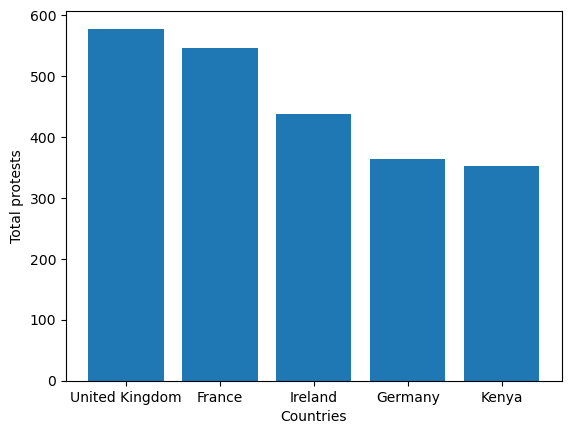

In [8]:
# Create a bar chart showing the top 5 countries with the most protests
plt.bar(x = Q2top.index, height = Q2top.values)
plt.xlabel("Countries")
plt.ylabel("Total protests")

Text(0, 0.5, 'Total protests')

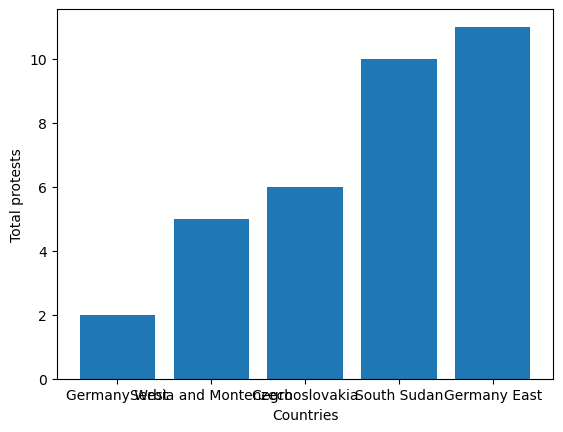

In [9]:
# Create a bar chart showing the top 5 countries with the least protests
plt.bar(x = Q2bot.index, height = Q2bot.values)
plt.xlabel("Countries")
plt.ylabel("Total protests")

Uh oh! Our country names are so long that they overlap one another. We could always make our chart larger, but why not use a horizontal bar chart instead? Then, we don't have to worry about the length of the labels on our bars.

This time, we'll use the `barh` method and specify the data for the y axis and bar widths.

Text(0.5, 0, 'Total protests')

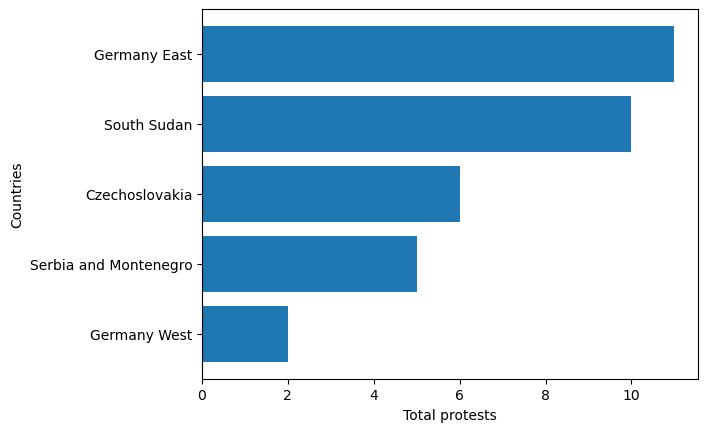

In [10]:
plt.barh(y = Q2bot.index, width = Q2bot.values)
plt.ylabel("Countries")
plt.xlabel("Total protests")

### <a id='toc6_6_'></a>[Question 3: Are length and size of protests different in various regions of the world?](#toc0_)

This question will be easier to answer if we subset our data to only include the columns we need. Once we've done that, we can use the `.info()` method to look at the data type of the columns we've selected.

In [11]:
Q3 = protests[["region", 
               "startyear", "startmonth", "startday", 
               "endyear", "endmonth", "endday", 
               "participants"]].copy()
Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17145 entries, 0 to 17144
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        17145 non-null  object 
 1   startyear     15239 non-null  float64
 2   startmonth    15239 non-null  float64
 3   startday      15239 non-null  float64
 4   endyear       15239 non-null  float64
 5   endmonth      15239 non-null  float64
 6   endday        15239 non-null  float64
 7   participants  15746 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.0+ MB


The `.info()` method lists the columns of our dataset along with some extra information on them. We can see how many non-missing values exist for each column, as well as each column's data type. As we'd expect, our day, month and year columns have a numeric dtype, "float64". Region has an "object" dtype because it contains text, but so does participants. The participants column is supposed to contain the number of participants for each protest, so why does it have the "object" dtype? Let's take a closer look at it.

In [12]:
Q3["participants"]

0            1000s
1             1000
2              500
3             100s
4              950
           ...    
17140          50+
17141    About 100
17142          NaN
17143          NaN
17144          NaN
Name: participants, Length: 17145, dtype: object

It looks like this column includes text. We can extract only the numbers using a **regular expression**. Regular expressions, or "regex" for short, are a popular method for detecting patterns in text. The `.str.extract()` method in pandas allows us to capture specific text using a regular expression. In this case, we want to extract only numeric digits and remove everything else.

[Click here for more information on regular expressions](https://docs.python.org/3/library/re.html).

In [13]:
Q3["participants"] = Q3["participants"].str.extract("(\d+)")
Q3["participants"]

0        1000
1        1000
2         500
3         100
4         950
         ... 
17140      50
17141     100
17142     NaN
17143     NaN
17144     NaN
Name: participants, Length: 17145, dtype: object

Note above that our dtype is still "object". To change the data type of a column, we can use the `.astype()` method. However, to successfully make participants an integer, we will need to remove any missing or blank values. Not doing so will give us an error. Our question can only be answered by knowing each protest's size and length anyway, so let's use the `.dropna()` on our dateset to remove any rows with missing information. Then, we can change the data type of the participants column.

In [14]:
# remove any rows with missing information
Q3 = Q3.dropna()

# change the participants column to an integer
Q3["participants"] = Q3["participants"].astype("int64")

Q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13988 entries, 0 to 17141
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        13988 non-null  object 
 1   startyear     13988 non-null  float64
 2   startmonth    13988 non-null  float64
 3   startday      13988 non-null  float64
 4   endyear       13988 non-null  float64
 5   endmonth      13988 non-null  float64
 6   endday        13988 non-null  float64
 7   participants  13988 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 983.5+ KB


Success!

Our next problem has to do with our date columns. Ultimately, we need to know how long each protest is. The good news is that pandas is capable of subtracting one date from another to provide a total number of days. The bad news is that we don't have two columns with two different dates. Instead, our dates are broken up into six separate columns.

The best way to combine our numbers into dates is to use dictionaries. We can turn our column names into dictionary keys using the `dict()` function. Then, pandas can create dates from those dictionaries with the `.to_datetime()` method.

In [15]:
# create dictionaries that combine the year, month and day columns
startdict = dict(year = Q3["startyear"], month = Q3["startmonth"], day = Q3["startday"])
enddict = dict(year = Q3["endyear"], month = Q3["endmonth"], day = Q3["endday"])

# create columns for start and end dates
Q3["startdate"] = pd.to_datetime(startdict)
Q3["enddate"] = pd.to_datetime(enddict)

# preview the new columns
Q3[["startdate", "enddate"]].head()

,startdate,enddate
0,1990-01-15,1990-01-15
1,1990-06-25,1990-06-25
2,1990-07-01,1990-07-01
3,1990-07-12,1990-09-06
4,1990-08-14,1990-08-15


But how many days does each protest last? To find out, we'll create a new column called "protestlength". To that column, we subtract the start date from the end date and assign the result. We also need to tell python what *type* of result to show. Number of days? Weeks? Months? The `.dt.days` attribute of our protestlength column will display the number of days. However, if both the start date and end date of the protest are the same, the number of days will be 0. So, we'll add 1 to all of our protest lengths to include the day on which the protest started.

In [16]:
# subtract the start date from end date and store the results in a new column
Q3["protestlength"] = Q3["enddate"] - Q3["startdate"]

# show protest length in number of days; add 1 to include the first day on which the protest occurred
Q3["protestlength"] = Q3["protestlength"].dt.days + 1

Q3.head()

,region,startyear,startmonth,startday,endyear,endmonth,endday,participants,startdate,enddate,protestlength
0,North America,1990.0,1.0,15.0,1990.0,1.0,15.0,1000,1990-01-15,1990-01-15,1
1,North America,1990.0,6.0,25.0,1990.0,6.0,25.0,1000,1990-06-25,1990-06-25,1
2,North America,1990.0,7.0,1.0,1990.0,7.0,1.0,500,1990-07-01,1990-07-01,1
3,North America,1990.0,7.0,12.0,1990.0,9.0,6.0,100,1990-07-12,1990-09-06,57
4,North America,1990.0,8.0,14.0,1990.0,8.0,15.0,950,1990-08-14,1990-08-15,2


Now that our dataframe is in order, we need to decide how to visualize it. We are interested in two numeric variables: protest length and protest size, so a scatterplot is a good choice. However, we also want to be able to compare different regions around the world. What we really need are multiple scatterplots - one for each region.

This is where the **seaborn** library comes in handy. Seaborn can create multiple visualizations at once using the `.FacetGrid()` method. If we set the "col" argument to "region", `.FacetGrid()` will give us a separate plot for each region. We can also use a different color for each plot by setting "hue" to "region" as well. "col_wrap" simply limits the number of charts that are shown on a single row of the grid.

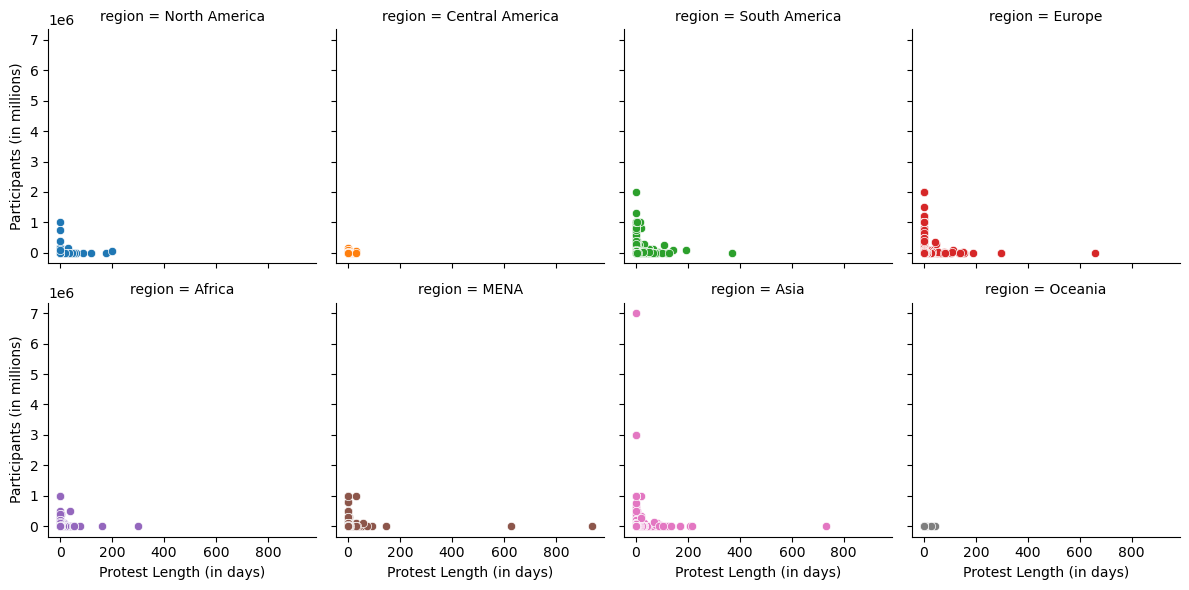

In [17]:
import seaborn as sns

# create a "grid" object using the FacetGrid function. 
grid = sns.FacetGrid(data = Q3, col = "region", col_wrap = 4, hue = "region")

# specify which chart we want to use on the grid and supply the variables for the x and y axis.
fig = grid.map_dataframe(sns.scatterplot, x = "protestlength", y = "participants")

# change the labels for our axes
fig.set_axis_labels("Protest Length (in days)", "Participants (in millions)")

These plots are difficult to interpret because some of our data points are at the high ends of our scales while the rest are clustered at the lower ends. It would be easier to see the differences between the data points at the lower ends of our axes if we used **logarithmic scales**.

Below, we create the series of scatterplots once more, but this time, we set the x and y scale of our grid object to be logarithmic.

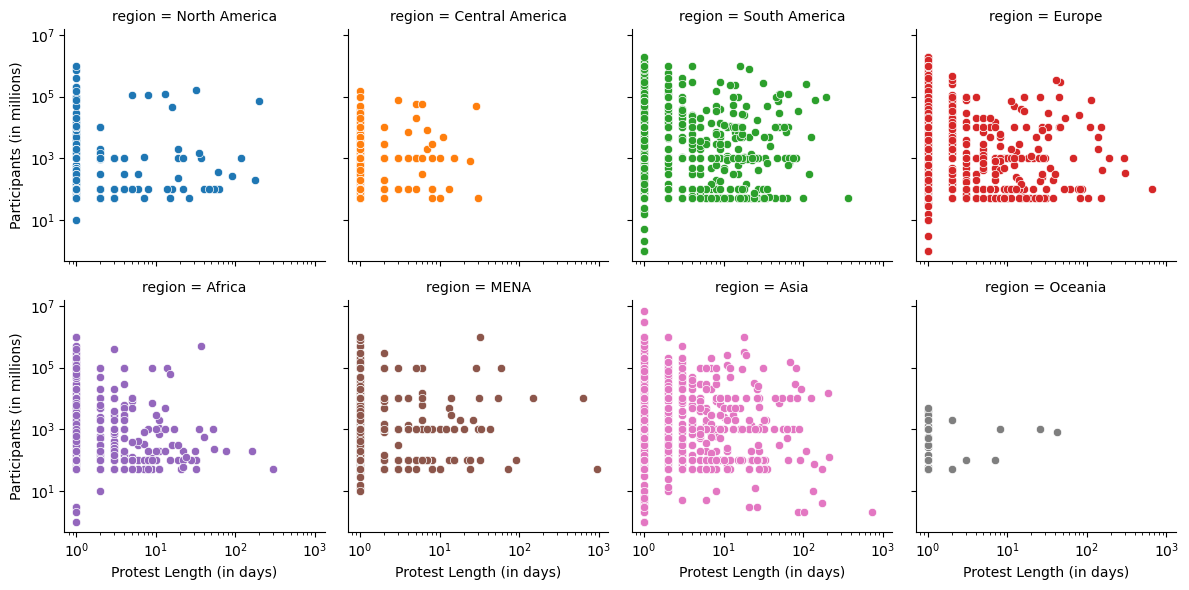

In [18]:
# create the grid object
grid = sns.FacetGrid(data = Q3, col = "region", col_wrap = 4, hue = "region")

# set both scales to logarithmic
grid.set(xscale="log", yscale="log")

# specify the chart to show on the grid
fig = grid.map_dataframe(sns.scatterplot, x = "protestlength", y = "participants")
fig.set_axis_labels("Protest Length (in days)", "Participants (in millions)")

Overall, these plots seem to tell us that fewer people attend longer protests. However, that trend is more pronounced in some regions like Europe as opposed to others like the Middle East & North Africa (MENA) where very long protests are still able to draw a large attendance. 

### <a id='toc6_7_'></a>[Question 4: Are there certain time periods with greater or fewer protests?](#toc0_)

To answer this question, we'll focus on the protest start date and the contry each protest took place in. We can grab the protest start dates from the "startdict" dictionary we used in Question 3.

A line plot is the standard way to visualize change over time. However, if we try to plot each day over a period of 30 years, our graph will become very cluttered. So, we'll change our date column to include only months using the `.dt.to_period()` method. Then, we'll group our dataframe using `.groupby()` to aggregate the total number of protests for each month. That will give us a much smoother line.

In [19]:
# select the columns we need
Q4 = protests[["id", "country"]].copy()

# create a date column from the "startdict" object we used in Question 3
Q4["date"] = pd.to_datetime(startdict)

# get only year-month dates for a smoother line
Q4["date"] = Q4["date"].dt.to_period('M')

# to get the total number of protests per month, we'll need to group by date
Q4_group = Q4.groupby("date")

Q4.head()

,id,country,date
0,201990001,Canada,1990-01
1,201990002,Canada,1990-06
2,201990003,Canada,1990-07
3,201990004,Canada,1990-07
4,201990005,Canada,1990-08


Let's use the **bokeh** library to create the line plot so that we can explore our results interactively. You'll notice that there is quite a bit of set up involved, as well as some extra code required for bokeh to display in Jupyter notebooks.

In [24]:
# load bokeh modules
from bokeh.models import *
from bokeh.application import *
from bokeh.application.handlers import *
from bokeh.layouts import *
from bokeh.io import *
from bokeh.plotting import *

# set up bokeh for working in jupyter notebooks - this uses similar functionality to %matplotlib inline
output_notebook()

# create a source object from our pandas dataframe
pdata = ColumnDataSource(Q4_group)

# set up the size of our plot and format the x axis for dates
p = figure(height = 300, width = 600, x_axis_type = "datetime")

# add a line to our plot
# we can use "id_count" to get a count of the protests for each month
p.line(source = pdata, x = "date", y = "id_count", width = 2)

# push the plot to jupyter notebooks
handler = show(p, notebook_handle = True)
push_notebook(handle = handler)

Loading BokehJS ...

Notice the icons on the right side of the line plot. These allow us to zoom in and out so we can examine the line in detail. Use the magnifying glass icon to zoom in very close and notice what happens to the dates at the bottom. They turn from years into months! When you are zoomed in, you can also use the arrows icon to click and drag around the line.

But this plot only uses the minimal amount of interactive features that are available in the bokeh. What if we want a dropdown menu that would let us filter the protests by country? To do that, we'll first need to create a list of all countries in the dataset. The `.unique()` method returns all unique values within a column, and `.tolist()` transforms those values into a list.

In [25]:
# create a list of countries for our drop-down menu
menu_list = Q4["country"].unique().tolist()

# sort the list alphabetically
menu_list.sort()

# preview the first 10 items on the list
menu_list[0:10]

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh']

Now we need to create the menu and link it to a plot. This is somewhat complex process compared to what we've done so far. Bokeh requires us to create a specific type of function that defines how to update the chart when a new country is selected.

[Click here for more information on defining functions](https://www.w3schools.com/python/python_functions.asp).

[Click here for more information on dynamically updating charts in bokeh](https://docs.bokeh.org/en/latest/docs/user_guide/interaction/widgets.html).

In [26]:
# create a new dataframe for when the default country, Afghanistan, is shown
default = Q4[Q4["country"] == "Afghanistan"].groupby("date")
p2data = ColumnDataSource(default)

# set up the size of our plot and format the x axis for dates
p2 = figure(height = 300, width = 600, x_axis_type = "datetime")

# add a line to our plot
p2.line(source = p2data, x = "date", y = "id_count", width = 2)

# create the dropdown menu with a list of all countries in our dataframe
menu = Select(title = "Select country", value = "Afghanistan", options = menu_list)

# define what happens when a new country is selected
def update_plot(attr, old, new):
    new_data = Q4[Q4["country"] == menu.value].groupby("date")
    p2data.data = new_data

# update the plot when a new country is selected
menu.on_change("value", update_plot)

# set up a layout for our menu and plot
lo = layout([[menu], [p2]])

# add the layout to the notebook
def modify_doc(doc):
    doc.add_root(lo)

# show the application in the notebook
handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app, notebook_handle = True)

&nbsp;

## <a id='toc7_'></a>[Learn more](#toc0_)
* `pandas` provides a quick introduction <a href="https://pandas.pydata.org/pandas-docs/stable/10min.html">here</a>
* <a href="https://jakevdp.github.io/PythonDataScienceHandbook/">Python Data Science Handbook</a> provides more detail and integration with other software.
* A full list of attributes and methods available for DataFrames is available <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html">here</a>.
* **Next Lesson: [Extra Topics in Pandas](https://unc-libraries-data.github.io/Python/Jupyter/Extra_Topics.html)**:
     + Merging and Reshaping datasets, Dealing with "Big Data"